## Policing in Schools
A look at whether school policing can predict graduation rates.

By Onel Abreu, Alexander Roche, Sabrina Sedovic

In [175]:
import pandas as pd

school_data = pd.read_csv("school_data.csv")
school_data.head(10)

,IEP_N,Total_x,IEP_P
0,54,471,0.114600
1,67,411,0.163000
2,79,354,0.223164
3,85,326,0.260700
4,93,733,0.126900
...,...,...,...
393,27,265,0.101900
394,62,448,0.138400
395,42,605,0.069400
396,54,887,0.060900


In [180]:
school_data = school_data.drop(columns = ["Unnamed: 0", "Unnamed: 0.1",
                                          "Dept/Unit Number", "Job Title_Chief Safety & Security OFF",
                                          "Job Title_Flex Team Security Officer",
                                          'Job Title_Safety And Security Off',
                                          'Job Title_Guidance Counselor Assistant',
                                          "Job Title_Career Counseling Manager",
                                          "Job Title_Director of Counseling",
                                          "Job Title_Director, School Counseling & Post Secondary Advising",
                                          "Job Title_HS Counseling Specialist", 
                                          "Job Title_K‐8 Counseling Specialist",
                                          "Job Title_Manager-Secdry Schl Counselng",
                                          'Job Title_Cntrl Office Security Officer',
                                          'Job Title_K-8 Counseling Specialist',"pos_name_0",
                                          "School_x", 'School Name_x',
                                          "School Name_y", "Total_y", 'School ID',
                                          "School Year"])

In [181]:
school_data.columns

Index(['Year', 'Job Title_School Security Officer',
       'Job Title_Senior School Security Officer',
       'Job Title_Senior Security Officer', 'Total Security',
       'Total Security_Filled', 'Job Title_School Counselor',
       'Total Counseling', 'Total Counseling_Filled', 'Total_x', 'Bilingual_N',
       'Bilingual_P', 'IEP_N', 'IEP_P', 'Free_Lunch_N', 'Free_Lunch_P',
       'Attendance', '5YR Grad Rate', 'White No', 'White Pct',
       'African American No', 'African American Pct',
       'Asian/Pacific Islander No', 'Asian/Pacific Islander Pct',
       'Native American/Alaskan No', 'Native American/Alaskan Pct',
       'Hispanic No', 'Hispanic Pct', 'Multi-Racial No', 'Multi-Racial Pct',
       'Asian No', 'Asian Pct', 'Hawaiian/Pacific Islander No',
       'Hawaiian/Pacific Islander Pct', 'Not Available No',
       'Not Available Pct', '# of Misconducts', '# of Group 1-2 Misconducts',
       '# of Group 3-4 Misconducts', '# of Group 5-6 Misconducts',
       '# of Suspensions

### Data Cleaning 

In [182]:
school_data.drop(school_data.loc[school_data["5YR Grad Rate"] == ' '].index, inplace=True)
school_data.dropna(subset=['5YR Grad Rate'], inplace=True)
school_data.reset_index(inplace=True)
school_data.drop("index", inplace=True, axis=1)
school_data.dropna(axis=0, inplace=True)
school_data['5YR Grad Rate'] =  school_data['5YR Grad Rate'].astype(float)

 ### Initial Data Analysis

In [183]:
school_data_analysis = school_data.copy()
school_data[["Total Security_Filled", "Total Counseling_Filled", "Total_x", "Expulsions per 100 Students"]].describe()

,Total Security_Filled,Total Counseling_Filled,Total_x,Expulsions per 100 Students
count,384.000000,384.000000,384.000000,384.000000
mean,5.942708,3.526042,1008.846354,0.159167
std,3.550729,2.678480,760.330071,0.333020
min,0.000000,0.000000,13.000000,0.000000
25%,3.000000,2.000000,462.750000,0.000000
50%,5.000000,3.000000,815.500000,0.000000
75%,8.000000,5.000000,1450.000000,0.180000
max,17.000000,15.000000,4366.000000,1.940000


In [184]:
school_data[['Bilingual_P', 'IEP_P', 'Free_Lunch_P', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance', '5YR Grad Rate']]

,Bilingual_P,IEP_P,Free_Lunch_P,White Pct,African American Pct,Asian/Pacific Islander Pct,Native American/Alaskan Pct,Hispanic Pct,Multi-Racial Pct,Asian Pct,Hawaiian/Pacific Islander Pct,Not Available Pct,Attendance,5YR Grad Rate
0,0.044600,0.114600,0.955400,1.5,81.3,0.0,0.2,11.3,1.5,4.0,0.2,0.0,90.3,69.8
1,0.060800,0.163000,0.919700,2.2,84.2,0.0,0.0,9.0,2.2,2.4,0.0,0.0,86.9,84.2
2,0.053672,0.223164,0.949153,2.8,80.5,0.0,0.0,11.9,2.0,2.3,0.0,0.6,88.3,77.6
3,0.055200,0.260700,0.960100,2.5,82.2,0.0,0.0,11.0,2.5,1.8,0.0,0.0,90.2,80.6
4,0.000000,0.126900,0.945400,0.0,98.1,0.0,0.1,1.6,0.1,0.0,0.0,0.0,89.6,75.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.000000,0.101900,0.962300,0.4,97.0,0.0,0.0,1.1,1.1,0.4,0.0,0.0,88.5,83.5
380,0.017900,0.138400,0.933000,0.0,97.8,0.0,0.0,1.8,0.0,0.2,0.0,0.2,87.8,80.6
381,0.005000,0.069400,0.547100,16.4,51.1,0.0,0.2,25.5,3.5,2.0,0.3,1.2,97.0,81.1
382,0.005600,0.060900,0.314500,43.7,14.0,0.0,0.6,21.6,4.9,15.1,0.1,0.0,92.9,95.3


In [185]:
school_data_analysis.groupby("Year")[['Bilingual_P', 'IEP_P', 'Free_Lunch_P', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance', '5YR Grad Rate']].mean()

,Bilingual_P,IEP_P,Free_Lunch_P,White Pct,African American Pct,Asian/Pacific Islander Pct,Native American/Alaskan Pct,Hispanic Pct,Multi-Racial Pct,Asian Pct,Hawaiian/Pacific Islander Pct,Not Available Pct,Attendance,5YR Grad Rate
Year,,,,,,,,,,,,,,
2012,0.053415,0.178015,0.905297,5.840541,55.393243,0.014865,0.272973,34.412162,0.940541,2.793243,0.083784,0.241892,81.870270,59.190541
2013,0.060286,0.174456,0.887768,6.642254,51.887324,0.014085,0.315493,36.490141,1.042254,3.202817,0.078873,0.330986,84.619718,64.667606
2014,0.064214,0.176769,0.854299,6.498864,50.953409,0.022727,0.327273,37.463636,0.993182,3.104545,0.112500,0.535227,86.907955,67.480682
2015,0.066168,0.184362,0.879609,7.056962,51.282278,0.008861,0.394937,36.606329,1.003797,3.178481,0.100000,0.377215,88.001266,70.569620
2016,0.074279,0.176421,0.859235,6.965278,49.581944,0.006944,0.245833,38.259722,1.047222,3.440278,0.088889,0.380556,88.312500,75.626389


In [186]:
school_data_analysis.groupby("Year")[["Total Security_Filled", "Total Counseling_Filled", "Total_x", "# of Students Expelled"]].sum()

,Total Security_Filled,Total Counseling_Filled,Total_x,# of Students Expelled
Year,,,,
2012,393,300,79836,192.0
2013,487,280,77702,119.0
2014,490,273,87236,72.0
2015,452,260,74961,48.0
2016,460,241,67662,60.0


Some initial notes from the preliminary data analysis:
- Filled security positions have remained somewhat consistent over the years, with a sudden increase in 2013 and then relatively around the same amount for the following year
- Counselors, however, have steadily fallen over the 5 year span being examined.
- Total amount of students at CPS schools also decreased suddenly in 2016, and had a sudden increase in 2014.
- Total suspensions have also dropped extremely since 2012, due to new policy enacted to ensure students were only being expelled with due process.
- Percentage of African American students have decreased, while Percentage of Hispanic students have increased (Bilingual students have also increased alongside this).
- Percentage of Free and Reduced lunch students has decreased
- Attendance, in general, was on the rise, along with an extreme rise in 5 year graduation rates.

In [187]:
school_data_analysis['Counselor_student_ratio'] = school_data_analysis['Total Counseling_Filled'] / school_data_analysis['Total_x']
school_data_analysis['Officer_student_ratio'] = school_data_analysis['Total Security_Filled'] / school_data_analysis['Total_x']
school_data_analysis['misconduct_student_ratio'] = school_data_analysis['# of Misconducts'] / school_data_analysis['Total_x']
school_data_analysis['pct_misconduct_grp_1-2'] = school_data_analysis['# of Group 1-2 Misconducts'] / school_data_analysis['# of Misconducts']
school_data_analysis['pct_misconduct_grp_3-4'] = school_data_analysis['# of Group 3-4 Misconducts'] / school_data_analysis['# of Misconducts']
school_data_analysis['pct_misconduct_grp_5-6'] = school_data_analysis['# of Group 5-6 Misconducts'] / school_data_analysis['# of Misconducts']

school_data_analysis.head()

,Year,Job Title_School Security Officer,Job Title_Senior School Security Officer,Job Title_Senior Security Officer,Total Security,Total Security_Filled,Job Title_School Counselor,Total Counseling,Total Counseling_Filled,Total_x,...,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students,Counselor_student_ratio,Officer_student_ratio,misconduct_student_ratio,pct_misconduct_grp_1-2,pct_misconduct_grp_3-4,pct_misconduct_grp_5-6
0,2012,1,0,0,1,1,2,3,2,471,...,5.0,1.1,0.0,0.00,0.004246,0.002123,1.129512,0.466165,0.496241,0.037594
1,2013,1,3,0,4,4,1,2,1,411,...,21.0,5.4,0.0,0.00,0.002433,0.009732,0.817518,0.041667,0.803571,0.154762
2,2014,1,3,0,4,4,1,1,1,354,...,11.0,3.4,0.0,0.00,0.002825,0.011299,1.892655,0.695522,0.277612,0.026866
3,2015,1,2,0,3,3,1,1,1,326,...,1.0,0.3,0.0,0.00,0.003067,0.009202,1.923313,0.572568,0.366826,0.060606
4,2012,6,0,0,6,6,4,6,5,733,...,11.0,1.6,4.0,0.57,0.006821,0.008186,0.620737,0.492308,0.428571,0.079121


In [190]:
school_data_analysis = school_data_analysis[['Year','Bilingual_P', 'IEP_P', 'Free_Lunch_P', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance',
        'pct_misconduct_grp_1-2',
        'pct_misconduct_grp_3-4',
        'pct_misconduct_grp_5-6',
        'misconduct_student_ratio',             
        '% of Misconducts Resulting in a Suspension\n(includes ISS and OSS)',
        'ISS per 100 Students',
        '% of Misconducts Resulting in an ISS',
        '% of Unique Students Receiving ISS',
        'Average Length of ISS',
        'OSS per 100 Students',
        '% of Misconducts Resulting in an OSS',
        '% of Unique Students Receiving OSS',
        'Average Length of OSS',
        '% of Misconducts Resulting in a Police Notification',
        'Police Notifications per 100 Students',
        '% of Unique Students Receiving Police Notification',
        'Expulsions per 100 Students',
        'Counselor_student_ratio',
        'Officer_student_ratio', 
        '5YR Grad Rate']]

In [192]:
school_data_analysis.head()

,Year,Bilingual_P,IEP_P,Free_Lunch_P,White Pct,African American Pct,Asian/Pacific Islander Pct,Native American/Alaskan Pct,Hispanic Pct,Multi-Racial Pct,...,% of Misconducts Resulting in an OSS,% of Unique Students Receiving OSS,Average Length of OSS,% of Misconducts Resulting in a Police Notification,Police Notifications per 100 Students,% of Unique Students Receiving Police Notification,Expulsions per 100 Students,Counselor_student_ratio,Officer_student_ratio,5YR Grad Rate
0,2012,0.044600,0.114600,0.955400,1.5,81.3,0.0,0.2,11.3,1.5,...,44.4,26.2,3.13,0.9,1.11,1.1,0.00,0.004246,0.002123,69.8
1,2013,0.060800,0.163000,0.919700,2.2,84.2,0.0,0.0,9.0,2.2,...,93.2,37.3,2.85,8.6,7.42,5.4,0.00,0.002433,0.009732,84.2
2,2014,0.053672,0.223164,0.949153,2.8,80.5,0.0,0.0,11.9,2.0,...,24.9,24.1,2.57,1.9,4.02,3.4,0.00,0.002825,0.011299,77.6
3,2015,0.055200,0.260700,0.960100,2.5,82.2,0.0,0.0,11.0,2.5,...,10.8,13.7,2.88,0.2,0.32,0.3,0.00,0.003067,0.009202,80.6
4,2012,0.000000,0.126900,0.945400,0.0,98.1,0.0,0.1,1.6,0.1,...,83.5,31.2,4.39,2.4,1.57,1.6,0.57,0.006821,0.008186,75.1


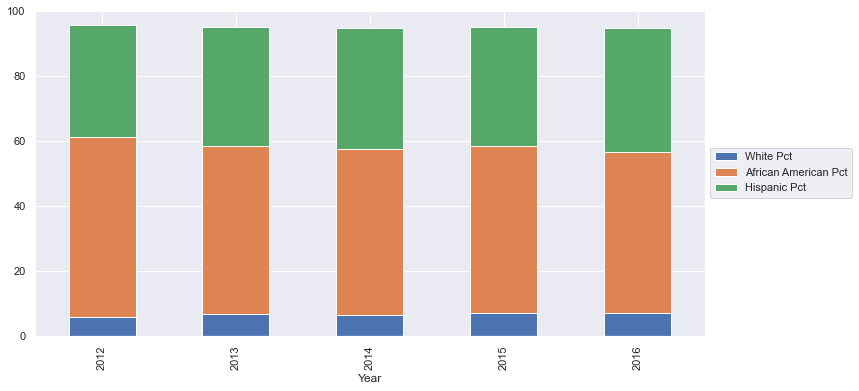

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set(rc={'figure.figsize':(11.7,8.27)})

total = school_data_analysis.groupby('Year')[['White Pct',
       'African American Pct',
        'Hispanic Pct']].mean().reset_index()
#total["Year"] = total["Year"].dt.year

plot = total.plot.bar(stacked=True, x='Year', figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

total = school_data_analysis.groupby('Year')[['White Pct',
       'African American Pct',
        'Hispanic Pct']].mean().reset_index()
#total["Year"] = total["Year"].dt.year

plot = total.plot.bar(stacked=True, x='Year', figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.show()



import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

df.sort_values(by=['RMSE'],inplace=True)

labels = df.index.values
x = np.arange(len(labels))
width = 0.3 

fix, ax = plt.subplots()
rects = ax.bar(x - width/3, df['RMSE'], width/3, label='RMSE')
rects2 = ax.bar(x, df['MAE'], width/3, label='MAE')
rects3 = ax.bar(x + width/3, df['R^2'], width/3, label='R^2')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()

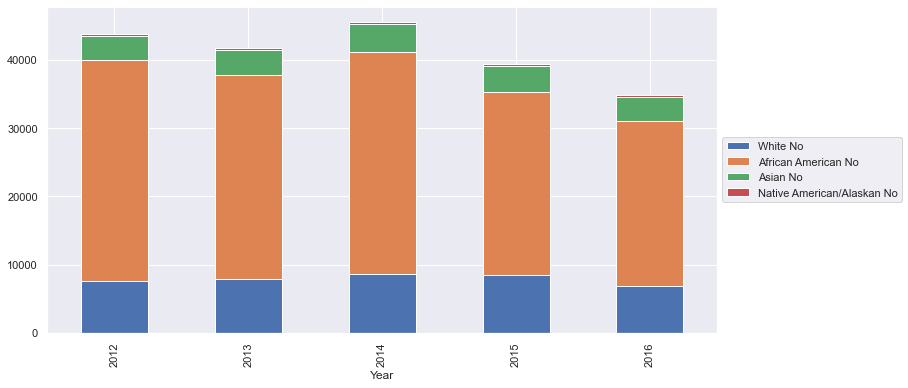

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set(rc={'figure.figsize':(11.7,8.27)})

total = school_data_analysis.groupby('Year')[['White No', 
                                              'African American No', 
                                              'Asian No',
                                               'Native American/Alaskan No',
                                               ]].sum().reset_index()

plot = total.plot.bar(stacked=True, x='Year', figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.show()

### Pipeline

In [197]:
import grid_search, helper, numpy as np

In [198]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
models = {"LinearRegression" : LinearRegression(),
          "Ridge" : Ridge(),
          "Lasso" : Lasso(),
          "ElasticNet" : ElasticNet()}

p_grid = {"LinearRegression" : [{}],
          "Ridge" : [{"alpha" : x} for x in [.1, .5, 1, 5, 10, 50, 100, 500, 1000]],
          "Lasso" : [{"alpha" : x} for x in [.1, .5, 1, 5, 10, 50, 100, 500, 1000]],
          "ElasticNet" : [{"alpha" : x,
                         "l1_ratio" : y} 
                          for x in [.1, 1, 10, 100, 1000] 
                          for y in [.1, .3, .5, .7, .9]]}

In [269]:
default_split = {0 : [[2012], 2013],
                 1 : [[2012, 2013], 2014],
                 2 : [[2012, 2013, 2014], 2015]}
test_year = 2016
default_ycol = "5YR Grad Rate"
default_selection_param = "RMSE"

df_train_y, df_train_x, df_val_y, df_val_x, df_test_y, df_test_x = grid_search.train_val_test_split(school_data_analysis, default_split, default_ycol)
df_train_x, df_val_x, df_test_x = grid_search.normalize(df_train_x,df_val_x, df_test_x)
avg_val_results = grid_search.grid_search_time_series_cv(df_train_y, df_train_x, df_val_y, df_val_x, models, p_grid)

### Evaluation

In [270]:
top_models = []
for model_type in models.keys():
    top_models.append(grid_search.select_best_model(avg_val_results[avg_val_results["Model"] == model_type], default_selection_param))

In [278]:
import helper
test_results, best = grid_search.choose_and_test_model(school_data_analysis, models, p_grid)
coefs, results = helper.find_features(school_data_analysis, best)
most_important_feats = list(coefs["coef"].abs().sort_values(ascending=False).head(15).index)
coefs["coef"].abs().sort_values(ascending=False).head(15)

65.65641025641027


% of Unique Students Receiving Police Notification    19.68
Police Notifications per 100 Students                 17.86
Attendance                                             5.92
Bilingual_P                                            5.49
IEP_P                                                  4.59
% of Unique Students Receiving OSS                     4.38
Officer_student_ratio                                  4.04
Average Length of OSS                                  1.90
Counselor_student_ratio                                1.55
White Pct                                              1.53
OSS per 100 Students                                   1.53
ISS per 100 Students                                   1.36
% of Misconducts Resulting in an OSS                   1.28
% of Unique Students Receiving ISS                     1.04
Native American/Alaskan Pct                            1.00
Name: coef, dtype: float64

In [279]:
most_important_feats = most_important_feats + ["Year", "5YR Grad Rate"]
most_important_feats 

['% of Unique Students Receiving Police Notification',
 'Police Notifications per 100 Students',
 'Attendance',
 'Bilingual_P',
 'IEP_P',
 '% of Unique Students Receiving OSS',
 'Officer_student_ratio',
 'Average Length of OSS',
 'Counselor_student_ratio',
 'White Pct',
 'OSS per 100 Students',
 'ISS per 100 Students',
 '% of Misconducts Resulting in an OSS',
 '% of Unique Students Receiving ISS',
 'Native American/Alaskan Pct',
 'Year',
 '5YR Grad Rate']

In [296]:
most_important_feats2 = ['% of Unique Students Receiving Police Notification',
 'Police Notifications per 100 Students',
 'Bilingual_P',
 'IEP_P',
 '% of Unique Students Receiving OSS',
 'Officer_student_ratio',
 'Average Length of OSS',
 'Counselor_student_ratio',
 'White Pct',
 'OSS per 100 Students',
 'ISS per 100 Students',
 '% of Misconducts Resulting in an OSS',
 '% of Unique Students Receiving ISS',
 'Native American/Alaskan Pct',
 'Year',
 '5YR Grad Rate']

In [297]:
subset = school_data_analysis[most_important_feats2]
display(subset)

,% of Unique Students Receiving Police Notification,Police Notifications per 100 Students,Bilingual_P,IEP_P,% of Unique Students Receiving OSS,Officer_student_ratio,Average Length of OSS,Counselor_student_ratio,White Pct,OSS per 100 Students,ISS per 100 Students,% of Misconducts Resulting in an OSS,% of Unique Students Receiving ISS,Native American/Alaskan Pct,Year,5YR Grad Rate
0,1.1,1.11,0.044600,0.114600,26.2,0.002123,3.13,0.004246,1.5,52.44,2.44,44.4,2.2,0.2,2012,69.8
1,5.4,7.42,0.060800,0.163000,37.3,0.009732,2.85,0.002433,2.2,80.05,3.07,93.2,2.8,0.0,2013,84.2
2,3.4,4.02,0.053672,0.223164,24.1,0.011299,2.57,0.002825,2.8,51.63,51.63,24.9,23.5,0.0,2014,77.6
3,0.3,0.32,0.055200,0.260700,13.7,0.009202,2.88,0.003067,2.5,21.68,83.86,10.8,33.8,0.0,2015,80.6
4,1.6,1.57,0.000000,0.126900,31.2,0.008186,4.39,0.006821,0.0,54.13,10.68,83.5,9.4,0.1,2012,75.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,9.8,13.29,0.000000,0.101900,21.1,0.022642,4.06,0.003774,0.4,29.32,21.90,19.1,18.0,0.0,2016,83.5
380,5.4,6.32,0.017900,0.138400,16.2,0.002232,5.52,0.004464,0.0,20.84,68.62,21.5,43.6,0.0,2016,80.6
381,0.0,0.00,0.005000,0.069400,7.3,0.004959,4.04,0.000000,16.4,11.30,2.61,43.6,2.4,0.2,2016,81.1
382,0.0,0.00,0.005600,0.060900,2.5,0.004510,3.18,0.005637,43.7,2.49,0.68,57.9,0.7,0.6,2016,95.3


In [298]:
df_train_y, df_train_x, df_val_y, df_val_x, df_test_y, df_test_x = grid_search.train_val_test_split(subset, default_split, default_ycol)
df_train_x, df_val_x, df_test_x = grid_search.normalize(df_train_x,df_val_x, df_test_x)
avg_val_results2 = grid_search.grid_search_time_series_cv(df_train_y, df_train_x, df_val_y, df_val_x, models, p_grid)


In [299]:
subset_results, best_subset = grid_search.choose_and_test_model(subset, models, p_grid)

In [300]:
best_subset["Model"] = "Subset"
best_subset

index           0
Model      Subset
Params         {}
RMSE      9.55873
MAE       7.27731
R^2       0.63916
Name: 0, dtype: object

In [301]:
top_models.append(best_subset)

In [302]:
df = helper.polynomial_transform(subset)
ply_results, bestply = grid_search.choose_and_test_model(df, models, p_grid)

In [303]:
bestply["Model"] = "Polynomial"
bestply

index                  0
Model         Polynomial
Params    {'alpha': 0.5}
RMSE             9.63862
MAE              7.63965
R^2             0.631099
Name: 11, dtype: object

In [304]:
top_models.append(bestply)

In [305]:
models_table = {'Model':[], 'RMSE':[], 'MAE':[], 'R^2':[]}
for model in top_models:
    models_table['Model'].append(model['Model'])
    models_table['RMSE'].append(model['RMSE'])
    models_table['MAE'].append(model['MAE'])
    models_table['R^2'].append(model['R^2'])

df = pd.DataFrame(data=models_table)
df = df.set_index('Model')

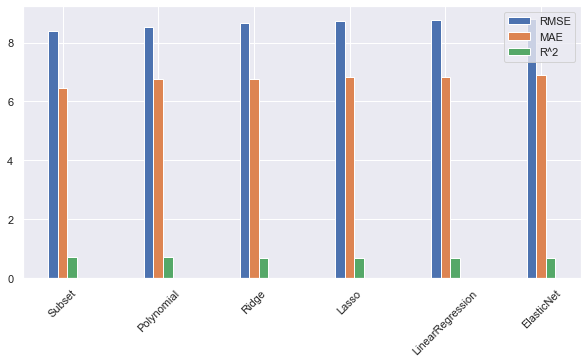

In [293]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

df.sort_values(by=['RMSE'],inplace=True)

labels = df.index.values
x = np.arange(len(labels))
width = 0.3 

fix, ax = plt.subplots()
rects = ax.bar(x - width/3, df['RMSE'], width/3, label='RMSE')
rects2 = ax.bar(x, df['MAE'], width/3, label='MAE')
rects3 = ax.bar(x + width/3, df['R^2'], width/3, label='R^2')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()